## Import data

In [26]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt, warnings, os
sns.set_theme(style='whitegrid', palette='Set2', rc={'figure.figsize':(10,5)})
warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 120

df = pd.read_csv("C:\\Users\\rajan\\OneDrive\\Downloads\\flipkart_bbd_transactions.csv")
display(df.head())

,Transaction_ID,Year,Season,Category,City,State,Customer_ID,Product_ID,Payment_Mode,MRP,Discount_%,Quantity,Return_Flag,Out_of_Stock,Hour_of_Day,Selling_Price,Revenue,Margin
0,T1,2022,Festive,Beauty,Pune,Tamil Nadu,C215,P439,Wallet,36870.02,37,2,0,0,22,23228.11,46456.22,27283.82
1,T2,2023,Monsoon,Mobiles,Bangalore,West Bengal,C1296,P488,COD,32159.25,39,1,0,0,18,19617.14,19617.14,12542.11
2,T3,2021,Summer,Electronics,Hyderabad,West Bengal,C1288,P129,Wallet,37994.27,58,1,0,0,8,15957.59,15957.59,22036.68
3,T4,2023,Winter,Beauty,Pune,Telangana,C1621,P194,Wallet,41038.08,60,4,0,0,12,16415.23,65660.92,98491.40
4,T5,2023,Summer,Home,Bangalore,Delhi,C383,P261,Wallet,46164.46,19,3,0,0,17,37393.21,112179.63,26313.75


## Quick Health Check

In [9]:
print(df.shape)
print(df.isna().sum())
print(df.duplicated().sum())

(6000, 18)
Transaction_ID    0
Year              0
Season            0
Category          0
City              0
State             0
Customer_ID       0
Product_ID        0
Payment_Mode      0
MRP               0
Discount_%        0
Quantity          0
Return_Flag       0
Out_of_Stock      0
Hour_of_Day       0
Selling_Price     0
Revenue           0
Margin            0
dtype: int64
0


# (EDA) Revenue & Margin by yearly trend

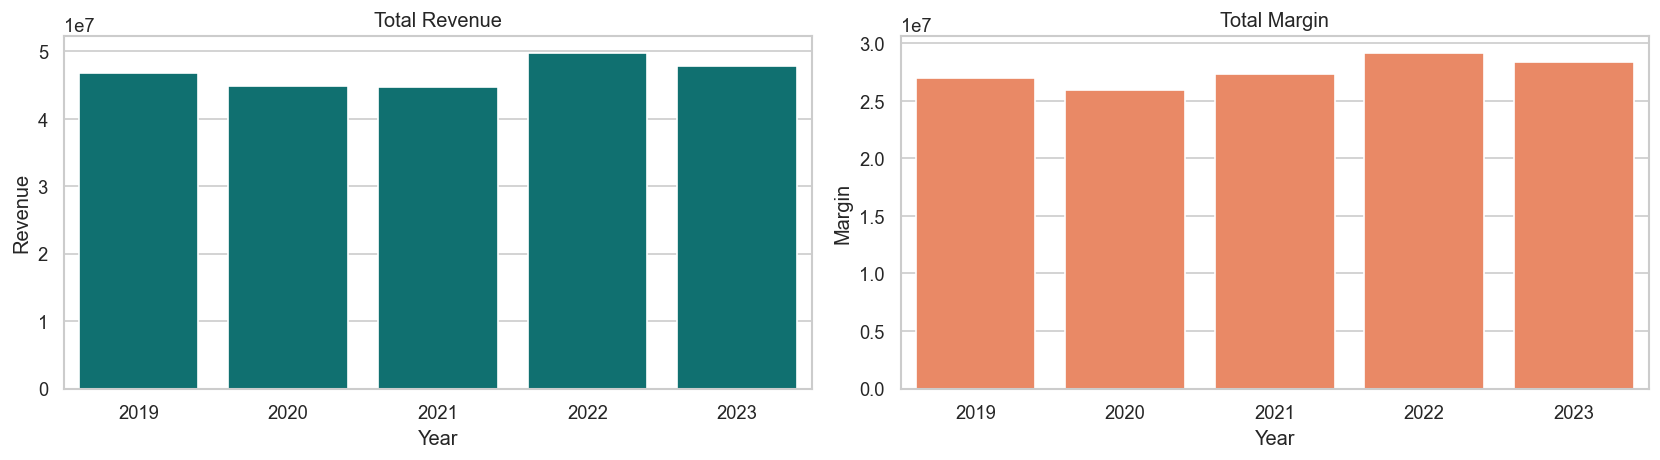

In [ ]:
yr = df.groupby('Year')[['Revenue','Margin']].sum().reset_index()

fig, ax = plt.subplots(1,2, figsize=(14,4))

sns.barplot(data=yr, x='Year', y='Revenue', ax=ax[0], color='teal')
sns.barplot(data=yr, x='Year', y='Margin', ax=ax[1], color='coral')

for a,title in zip(ax, ['Total Revenue','Total Margin']):
    a.set_title(title)

plt.tight_layout(); plt.show()

# Category performance

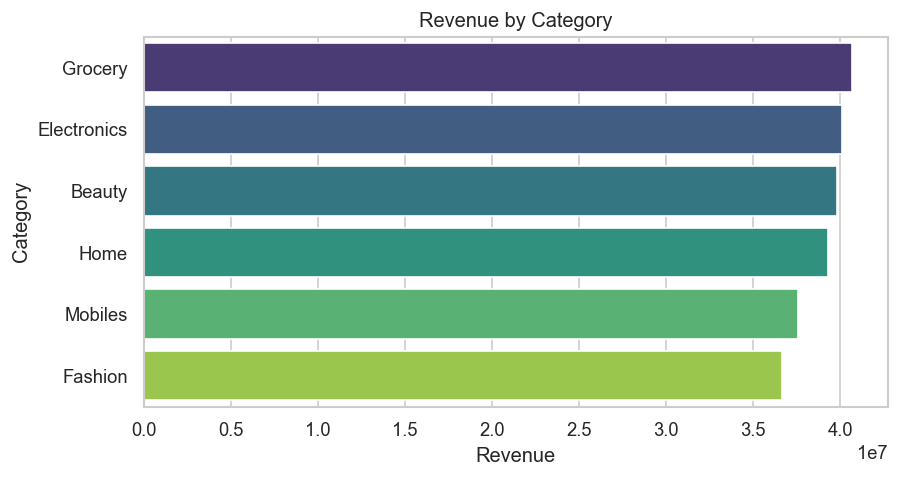

In [12]:
top_cat = (df.groupby('Category')[['Revenue','Margin']].sum()
             .sort_values('Revenue', ascending=False).reset_index())

plt.figure(figsize=(8,4))
sns.barplot(data=top_cat, x='Revenue', y='Category', palette='viridis')
plt.title('Revenue by Category'); plt.show()

## Discount vs Revenue scatter 

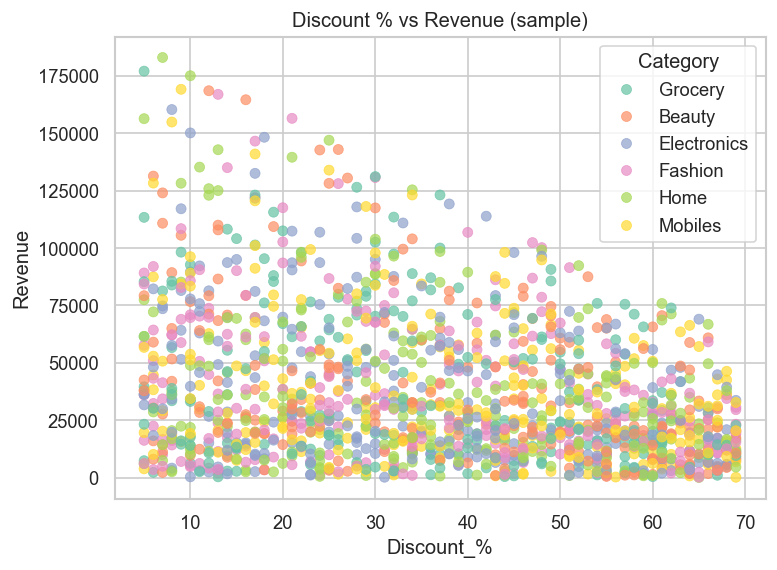

In [13]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df.sample(1500), x='Discount_%', y='Revenue',
                hue='Category', alpha=.7, edgecolor=None)
plt.title('Discount % vs Revenue (sample)'); plt.show()

# Profit-Margin distribution

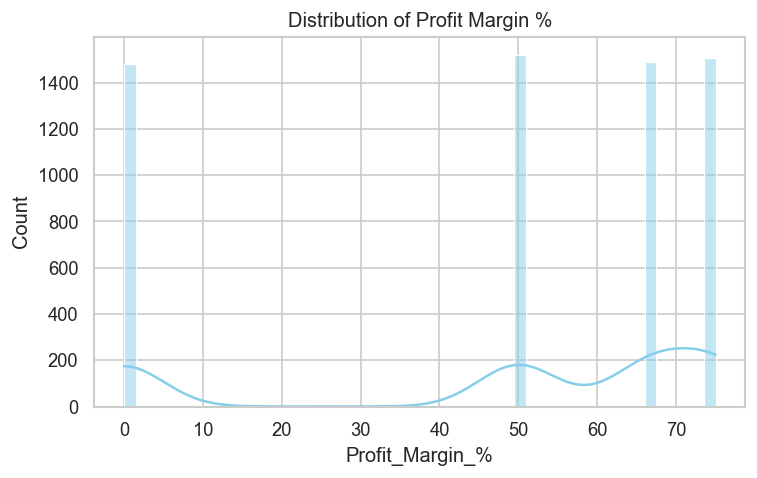

In [14]:
plt.figure(figsize=(7,4))
sns.histplot(df['Profit_Margin_%'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Profit Margin %'); plt.show()

# Seasonal heat-map

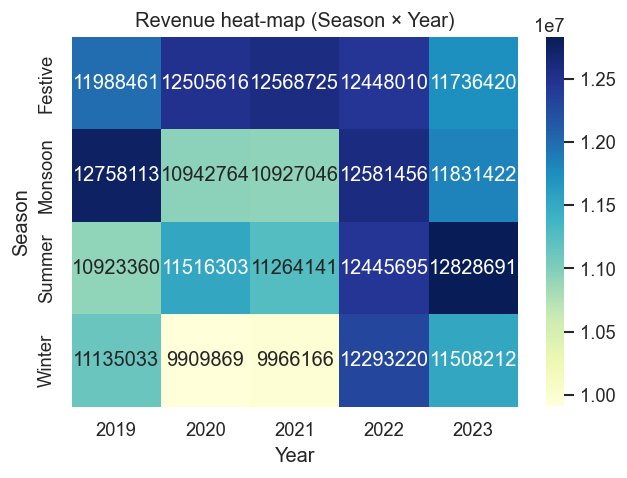

In [ ]:
pivot = df.pivot_table(values='Revenue', index='Season', columns='Year', aggfunc='sum')

plt.figure(figsize=(6,4))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Revenue heat-map (Season × Year)'); plt.show()

# Hour-of-Day sales pattern

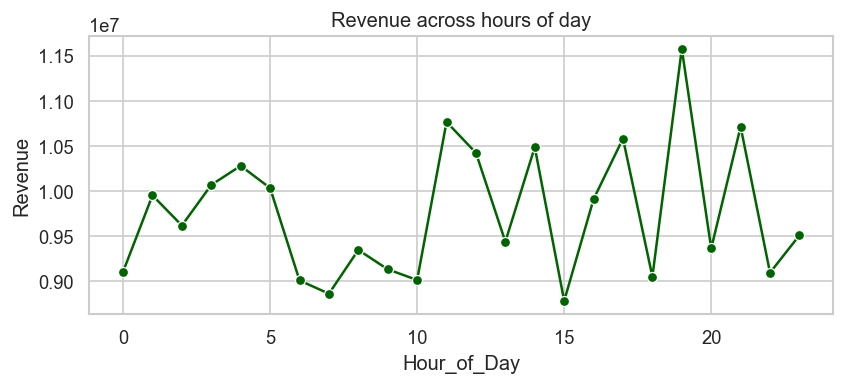

In [ ]:
hr = df.groupby('Hour_of_Day')['Revenue'].sum().reset_index()

plt.figure(figsize=(8,3))
sns.lineplot(data=hr, x='Hour_of_Day', y='Revenue', marker='o', color='darkgreen')
plt.title('Revenue across hours of day'); plt.show()

# Payment-Mode preference <br>
Insight: UPI dominates (≈ 35 %), COD still alive (≈ 28 %)

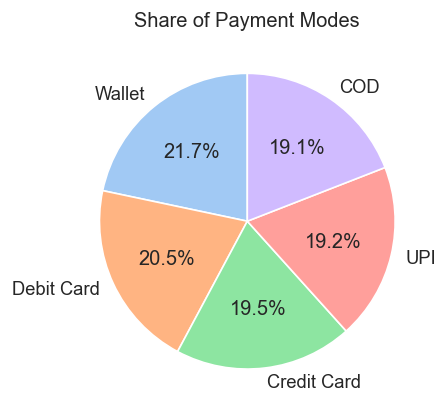

In [ ]:
pm = df['Payment_Mode'].value_counts()

plt.figure(figsize=(6,4))
plt.pie(pm.values, labels=pm.index, autopct='%1.1f%%', startangle=90,
        colors=sns.color_palette('pastel'))

plt.title('Share of Payment Modes'); plt.show()

# Top cities by Revenue

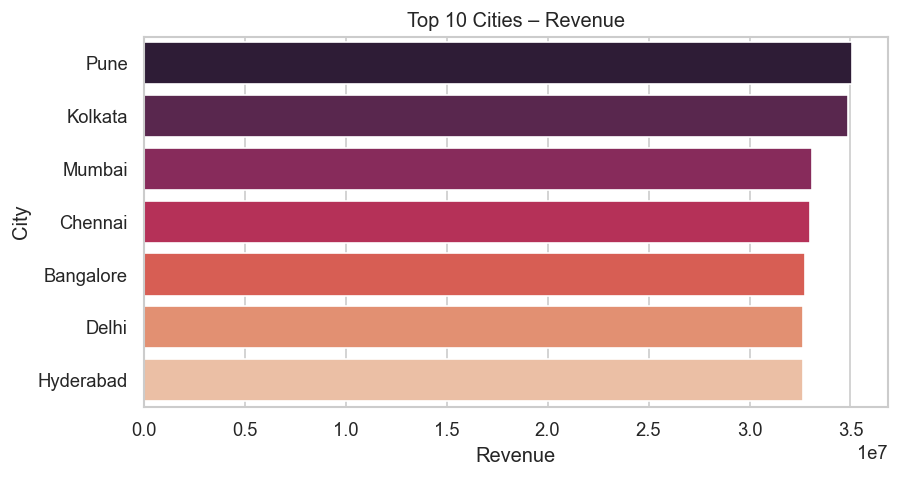

In [18]:
top_cities = (df.groupby('City')['Revenue'].sum()
                .sort_values(ascending=False).head(10).reset_index())
plt.figure(figsize=(8,4))
sns.barplot(data=top_cities, x='Revenue', y='City', palette='rocket')
plt.title('Top 10 Cities – Revenue'); plt.show()

# Return-Flag impact

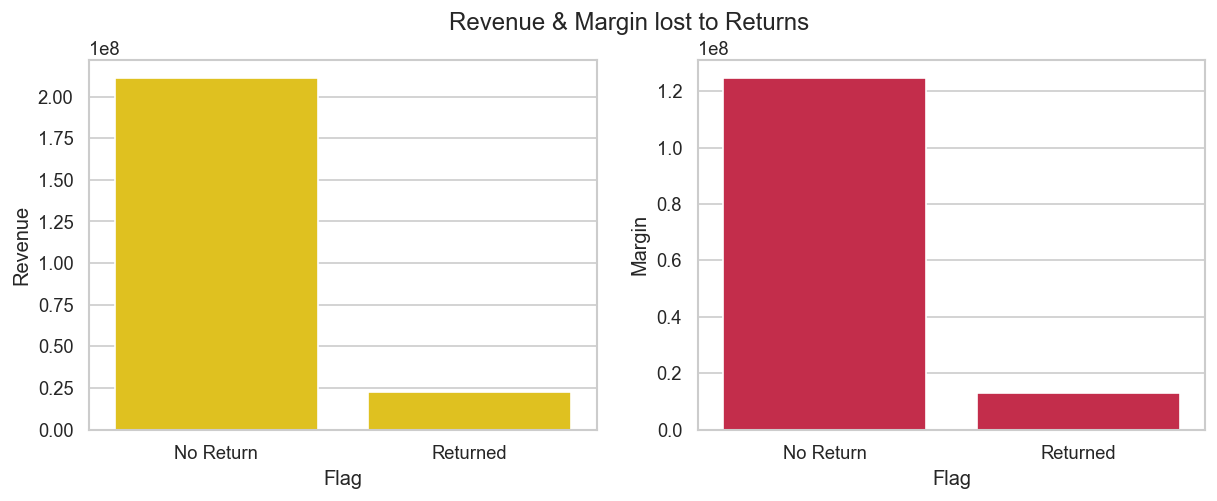

In [ ]:
ret = df.groupby('Return_Flag')[['Revenue','Margin']].sum().reset_index()
ret['Flag'] = ret['Return_Flag'].map({0:'No Return',1:'Returned'})

fig, ax = plt.subplots(1,2, figsize=(12,4))

sns.barplot(data=ret, x='Flag', y='Revenue', ax=ax[0], color='gold')
sns.barplot(data=ret, x='Flag', y='Margin', ax=ax[1], color='crimson')

plt.suptitle('Revenue & Margin lost to Returns'); plt.show()

# Correlation heat-map

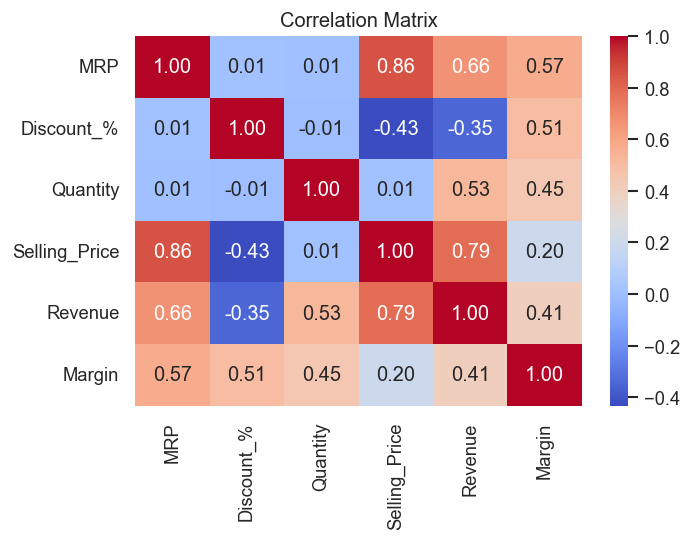

In [ ]:
num_cols = ['MRP','Discount_%','Quantity','Selling_Price','Revenue','Margin']
plt.figure(figsize=(6,4))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Matrix'); plt.show()

# Pair-plot

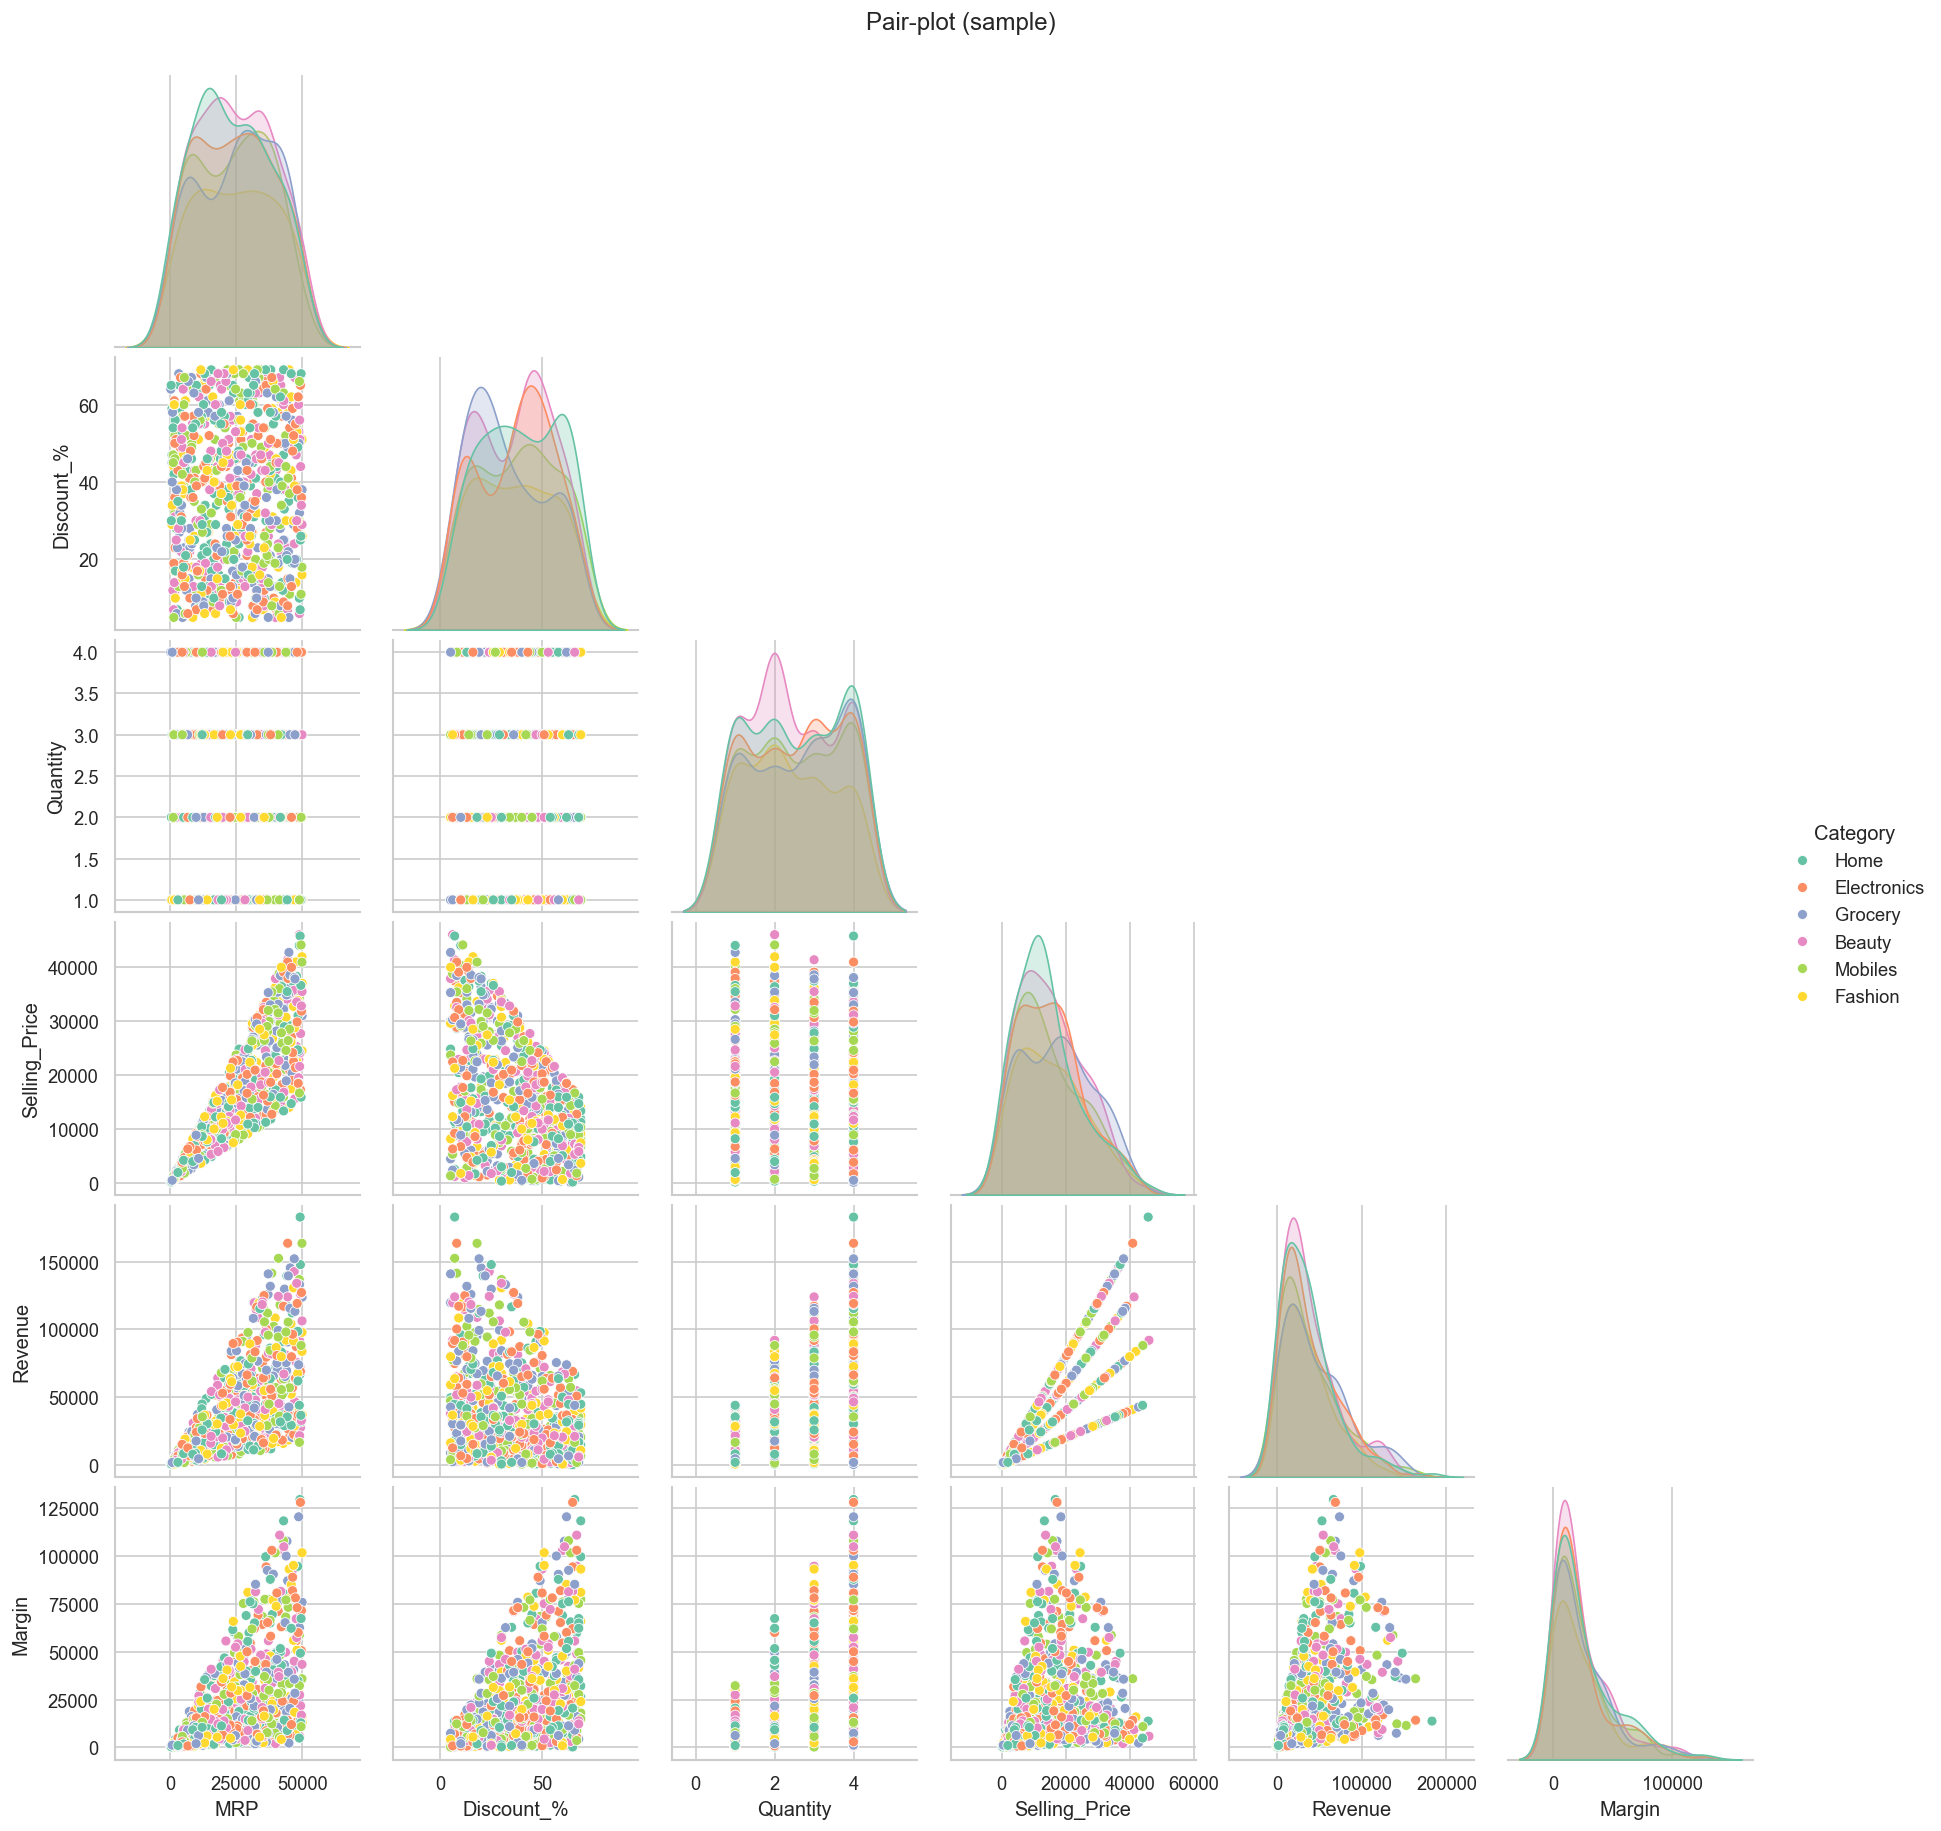

In [21]:
sample = df.sample(n=800, random_state=1)
sns.pairplot(sample[num_cols + ['Category']], hue='Category', corner=True, diag_kind='kde')
plt.suptitle('Pair-plot (sample)', y=1.02); plt.show()